<a href="https://colab.research.google.com/github/rencdr/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [26]:
!pip install quandl
import quandl

In [27]:
data = quandl.get("WIKI/AAPL")

In [28]:
data = data[['Close']]

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [30]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

In [33]:
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[(i + time_steps), 0])
    return np.array(X), np.array(Y)

time_steps = 30
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)


In [34]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
235/235 [==============================] - 11s 30ms/step - loss: 2.3084e-04
Epoch 2/20
235/235 [==============================] - 6s 28ms/step - loss: 4.9237e-05
Epoch 3/20
235/235 [==============================] - 7s 30ms/step - loss: 4.1169e-05
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 3.3491e-05
Epoch 5/20
235/235 [==============================] - 7s 29ms/step - loss: 3.1559e-05
Epoch 6/20
235/235 [==============================] - 7s 30ms/step - loss: 2.9058e-05
Epoch 7/20
235/235 [==============================] - 10s 41ms/step - loss: 2.5070e-05
Epoch 8/20
235/235 [==============================] - 7s 31ms/step - loss: 2.8061e-05
Epoch 9/20
235/235 [==============================] - 8s 36ms/step - loss: 2.0380e-05
Epoch 10/20
235/235 [==============================] - 9s 36ms/step - loss: 1.9082e-05
Epoch 11/20
235/235 [==============================] - 9s 40ms/step - loss: 2.0288e-05
Epoch 12/20
235/235 [=============================

In [36]:
test_predictions = model.predict(X_test)


58/58 [==============================] - 1s 9ms/step


In [37]:
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

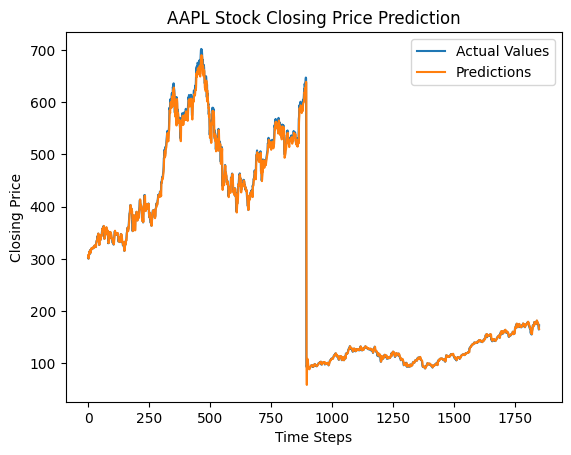

In [39]:
plt.plot(y_test.flatten(), label='Actual Values')
plt.plot(test_predictions.flatten(), label='Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Closing Price Prediction')
plt.legend()
plt.show()